In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/car data/Train'
valid_path = '/content/drive/MyDrive/car data/Test'

In [4]:
#Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet=ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94765736/94765736 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [33]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/car data/Train/*')

In [34]:
x = Flatten()(resnet.output)


In [35]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [36]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [37]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [38]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [39]:
 # Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/car data/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [40]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/car data/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 58 images belonging to 3 classes.


In [41]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 21s 16s/step - loss: 4.8350 - accuracy: 0.2969 - val_loss: 12.5864 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 858ms/step - loss: 8.3253 - accuracy: 0.3594 - val_loss: 7.1365 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 1s 839ms/step - loss: 2.9708 - accuracy: 0.4688 - val_loss: 3.9293 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 1s 820ms/step - loss: 6.0851 - accuracy: 0.3438 - val_loss: 2.8498 - val_accuracy: 0.5345
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 3.5389 - accuracy: 0.4375 - val_loss: 3.2274 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 2.0779 - accuracy: 0.4688 - val_loss: 4.9378 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 1s 818ms/step - loss: 3.2340 - accuracy: 0.4219 - val_loss: 1.2653 - val_accuracy: 0.5000
Epoch 8/50
2/2 [==========

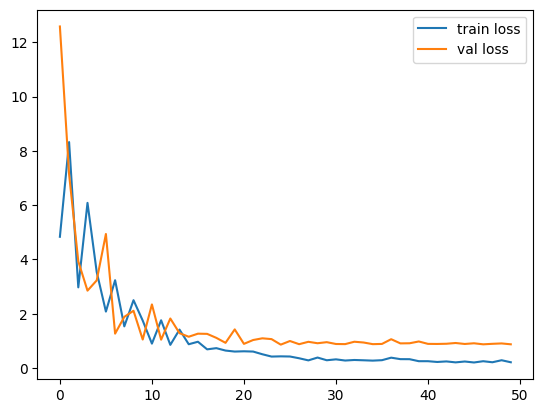

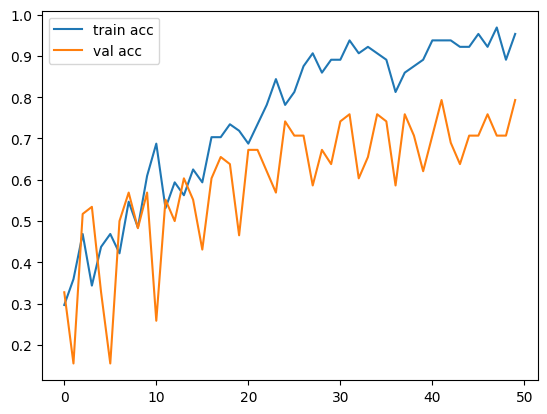

<Figure size 640x480 with 0 Axes>

In [42]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [52]:
from tensorflow.keras.models import load_model
model.save('car_model_resnet50.h5')

In [53]:
y_pred = model.predict(test_set)

2/2 [==============================] - 2s 205ms/step


In [58]:
y_pred

array([0, 2, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2,
       0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1])

In [60]:
model=load_model('car_model_resnet50.h5')


In [62]:
img=image.load_img('/content/drive/MyDrive/car data/Test/lamborghini/10.jpg',target_size=(224,224))


In [63]:
x=image.img_to_array(img)

In [64]:
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [65]:
x.shape

(224, 224, 3)

In [66]:
x=x/255

In [67]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [68]:
model.predict(img_data)

1/1 [==============================] - 97s 97s/step


array([[0.03226576, 0.06799173, 0.8997425 ]], dtype=float32)

In [69]:
a=np.argmax(model.predict(img_data), axis=1)


1/1 [==============================] - 0s 44ms/step
